In [17]:
!pip install xgboost

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [19]:
# Load processed datasets
X_train = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/processed/X_train_failure.csv')
X_test = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/processed/X_test_failure.csv')
y_train = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/processed/y_train_failure.csv')
y_test = pd.read_csv('C:/Users/lynda/OneDrive/Bureau/sousou/data/processed/y_test_failure.csv')

# Convert to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"📊 Data Loaded:")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Features: {X_train.shape[1]}")
print(f"\n   Training class distribution:")
print(f"   - No Fail (0): {(y_train == 0).sum()} ({(y_train == 0).sum()/len(y_train)*100:.1f}%)")
print(f"   - Will Fail (1): {(y_train == 1).sum()} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")

📊 Data Loaded:
   Training samples: 80
   Test samples: 20
   Features: 14

   Training class distribution:
   - No Fail (0): 58 (72.5%)
   - Will Fail (1): 22 (27.5%)


In [20]:
# Train Logistic Regression (Baseline)
print("🔄 Training Logistic Regression (Baseline)...")

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("\n✅ Logistic Regression Results:")
print(f"   Accuracy:  {lr_accuracy:.3f}")
print(f"   Precision: {lr_precision:.3f}")
print(f"   Recall:    {lr_recall:.3f}")
print(f"   F1-Score:  {lr_f1:.3f}")
print(f"   ROC-AUC:   {lr_roc_auc:.3f}")

🔄 Training Logistic Regression (Baseline)...

✅ Logistic Regression Results:
   Accuracy:  0.700
   Precision: 0.000
   Recall:    0.000
   F1-Score:  0.000
   ROC-AUC:   0.464


In [21]:
# Train Random Forest
print("🔄 Training Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("\n✅ Random Forest Results:")
print(f"   Accuracy:  {rf_accuracy:.3f}")
print(f"   Precision: {rf_precision:.3f}")
print(f"   Recall:    {rf_recall:.3f}")
print(f"   F1-Score:  {rf_f1:.3f}")
print(f"   ROC-AUC:   {rf_roc_auc:.3f}")

🔄 Training Random Forest...

✅ Random Forest Results:
   Accuracy:  0.650
   Precision: 0.333
   Recall:    0.167
   F1-Score:  0.222
   ROC-AUC:   0.631


In [22]:
# Train XGBoost
print("🔄 Training XGBoost...")

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # Handle imbalance
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)

print("\n✅ XGBoost Results:")
print(f"   Accuracy:  {xgb_accuracy:.3f}")
print(f"   Precision: {xgb_precision:.3f}")
print(f"   Recall:    {xgb_recall:.3f}")
print(f"   F1-Score:  {xgb_f1:.3f}")
print(f"   ROC-AUC:   {xgb_roc_auc:.3f}")

🔄 Training XGBoost...

✅ XGBoost Results:
   Accuracy:  0.700
   Precision: 0.500
   Recall:    0.500
   F1-Score:  0.500
   ROC-AUC:   0.560


In [23]:
# Train SVM
print("🔄 Training Support Vector Machine...")

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True,
    class_weight='balanced'
)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

print("\n✅ SVM Results:")
print(f"   Accuracy:  {svm_accuracy:.3f}")
print(f"   Precision: {svm_precision:.3f}")
print(f"   Recall:    {svm_recall:.3f}")
print(f"   F1-Score:  {svm_f1:.3f}")
print(f"   ROC-AUC:   {svm_roc_auc:.3f}")

🔄 Training Support Vector Machine...

✅ SVM Results:
   Accuracy:  0.450
   Precision: 0.353
   Recall:    1.000
   F1-Score:  0.522
   ROC-AUC:   0.393


In [24]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy],
    'Precision': [lr_precision, rf_precision, xgb_precision, svm_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall, svm_recall],
    'F1-Score': [lr_f1, rf_f1, xgb_f1, svm_f1],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc, xgb_roc_auc, svm_roc_auc]
})

print("="*80)
print("MODEL COMPARISON")
print("="*80)
print(results.to_string(index=False))
print("\n")

# Find best model
best_model_idx = results['F1-Score'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
print(f"🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {results.loc[best_model_idx, 'F1-Score']:.3f}")
print(f"   Recall: {results.loc[best_model_idx, 'Recall']:.3f}")

MODEL COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression      0.70   0.000000 0.000000  0.000000 0.464286
      Random Forest      0.65   0.333333 0.166667  0.222222 0.630952
            XGBoost      0.70   0.500000 0.500000  0.500000 0.559524
                SVM      0.45   0.352941 1.000000  0.521739 0.392857


🏆 Best Model: SVM
   F1-Score: 0.522
   Recall: 1.000


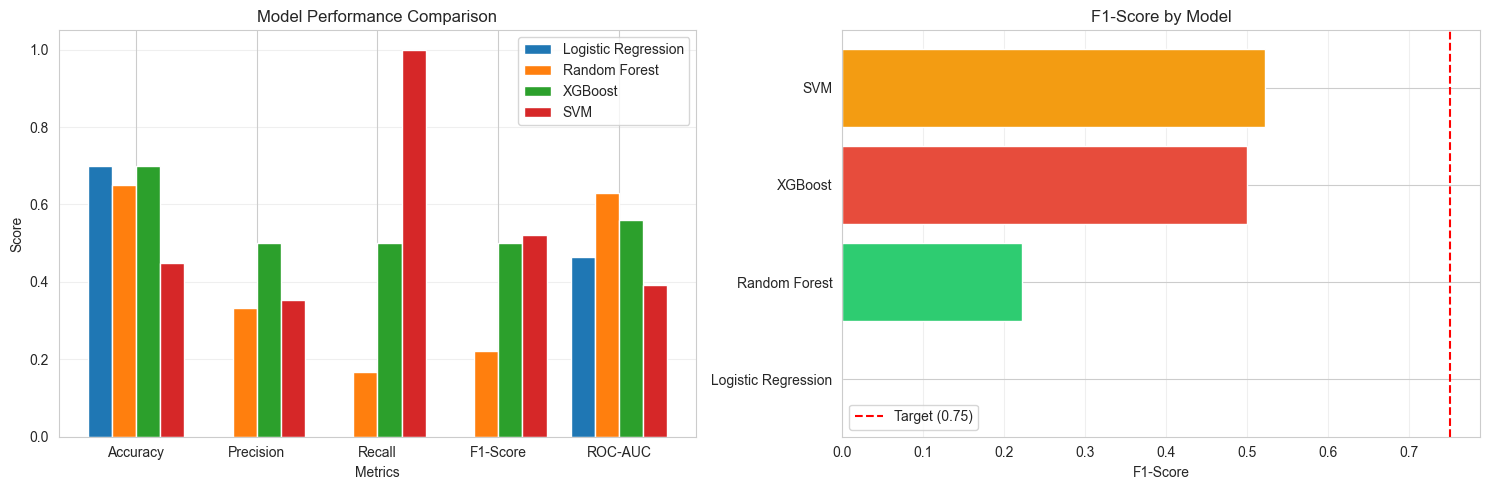

✅ Visualization complete


In [25]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.2

for i, model in enumerate(results['Model']):
    values = results.iloc[i, 1:].values
    axes[0].bar(x + i*width, values, width, label=model)

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: F1-Score comparison
axes[1].barh(results['Model'], results['F1-Score'], color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'])
axes[1].set_xlabel('F1-Score')
axes[1].set_title('F1-Score by Model')
axes[1].axvline(x=0.75, color='red', linestyle='--', label='Target (0.75)')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete")

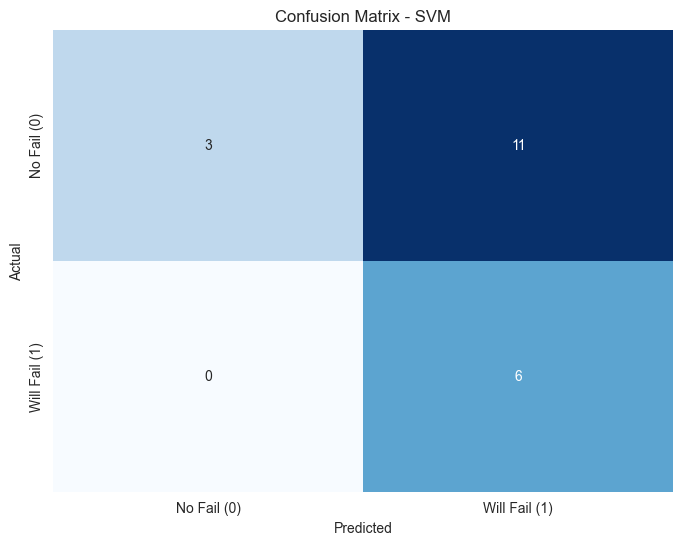


📊 Confusion Matrix Analysis (SVM):
   True Negatives (TN):  3 - Correctly predicted NO failure
   False Positives (FP): 11 - False alarms
   False Negatives (FN): 0 - Missed failures (⚠️ Critical!)
   True Positives (TP):  6 - Correctly predicted failure


In [26]:
# Select best model predictions
if best_model_name == 'Logistic Regression':
    y_pred_best = y_pred_lr
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
elif best_model_name == 'XGBoost':
    y_pred_best = y_pred_xgb
else:
    y_pred_best = y_pred_svm

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['No Fail (0)', 'Will Fail (1)'])
plt.yticks([0.5, 1.5], ['No Fail (0)', 'Will Fail (1)'])
plt.show()

# Print detailed metrics
print(f"\n📊 Confusion Matrix Analysis ({best_model_name}):")
print(f"   True Negatives (TN):  {cm[0,0]} - Correctly predicted NO failure")
print(f"   False Positives (FP): {cm[0,1]} - False alarms")
print(f"   False Negatives (FN): {cm[1,0]} - Missed failures (⚠️ Critical!)")
print(f"   True Positives (TP):  {cm[1,1]} - Correctly predicted failure")

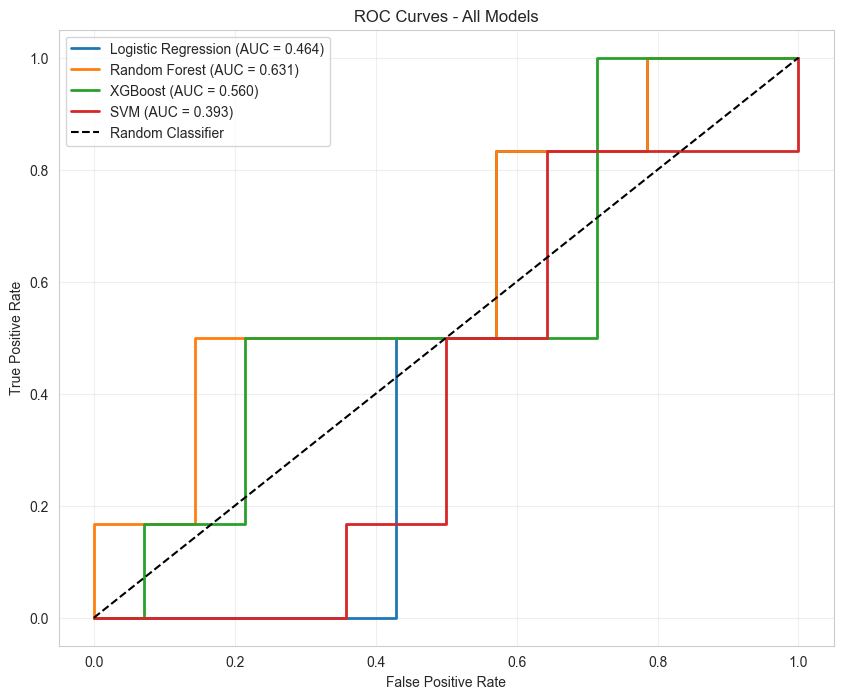

✅ ROC curves plotted


In [27]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
models_data = [
    ('Logistic Regression', y_pred_proba_lr, lr_roc_auc),
    ('Random Forest', y_pred_proba_rf, rf_roc_auc),
    ('XGBoost', y_pred_proba_xgb, xgb_roc_auc),
    ('SVM', y_pred_proba_svm, svm_roc_auc)
]

for model_name, y_proba, auc_score in models_data:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("✅ ROC curves plotted")

In [28]:
# Feature importance (for tree-based models)
if best_model_name in ['Random Forest', 'XGBoost']:
    if best_model_name == 'Random Forest':
        importances = rf_model.feature_importances_
    else:
        importances = xgb_model.feature_importances_
    
    # Create dataframe
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance.head(10)['Feature'], feature_importance.head(10)['Importance'])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Most Important Features - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Top 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))
else:
    print(f"⚠️ Feature importance not available for {best_model_name}")

⚠️ Feature importance not available for SVM


In [29]:
# Save the best model
if best_model_name == 'Logistic Regression':
    best_model = lr_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
else:
    best_model = svm_model

# Save model
model_path = '../models/failure_prediction_model.pkl'
joblib.dump(best_model, model_path)

print(f"✅ Best model saved: {model_path}")
print(f"   Model: {best_model_name}")
print(f"   F1-Score: {results.loc[best_model_idx, 'F1-Score']:.3f}")
print(f"   Recall: {results.loc[best_model_idx, 'Recall']:.3f}")

✅ Best model saved: ../models/failure_prediction_model.pkl
   Model: SVM
   F1-Score: 0.522
   Recall: 1.000


In [30]:
from sklearn.model_selection import GridSearchCV

print("🔄 Hyperparameter Tuning - Random Forest...")
print("This may take a few minutes...\n")

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Grid search with cross-validation
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='recall',  # Optimize for recall
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("\n✅ Best Parameters:")
for param, value in rf_grid.best_params_.items():
    print(f"   {param}: {value}")

# Evaluate tuned model
y_pred_rf_tuned = rf_grid.predict(X_test)
y_pred_proba_rf_tuned = rf_grid.predict_proba(X_test)[:, 1]

rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_tuned_precision = precision_score(y_test, y_pred_rf_tuned)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned)
rf_tuned_f1 = f1_score(y_test, y_pred_rf_tuned)
rf_tuned_roc_auc = roc_auc_score(y_test, y_pred_proba_rf_tuned)

print("\n📊 Tuned Random Forest Results:")
print(f"   Accuracy:  {rf_tuned_accuracy:.3f}")
print(f"   Precision: {rf_tuned_precision:.3f}")
print(f"   Recall:    {rf_tuned_recall:.3f}")
print(f"   F1-Score:  {rf_tuned_f1:.3f}")
print(f"   ROC-AUC:   {rf_tuned_roc_auc:.3f}")

🔄 Hyperparameter Tuning - Random Forest...
This may take a few minutes...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✅ Best Parameters:
   class_weight: balanced
   max_depth: 5
   min_samples_leaf: 4
   min_samples_split: 10
   n_estimators: 100

📊 Tuned Random Forest Results:
   Accuracy:  0.650
   Precision: 0.333
   Recall:    0.167
   F1-Score:  0.222
   ROC-AUC:   0.548


In [31]:
print("🔄 Hyperparameter Tuning - XGBoost...")
print("This may take a few minutes...\n")

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [2, 3, 4]  # Handle imbalance
}

# Grid search with cross-validation
xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42),
    xgb_param_grid,
    cv=5,
    scoring='recall',  # Optimize for recall
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("\n✅ Best Parameters:")
for param, value in xgb_grid.best_params_.items():
    print(f"   {param}: {value}")

# Evaluate tuned model
y_pred_xgb_tuned = xgb_grid.predict(X_test)
y_pred_proba_xgb_tuned = xgb_grid.predict_proba(X_test)[:, 1]

xgb_tuned_accuracy = accuracy_score(y_test, y_pred_xgb_tuned)
xgb_tuned_precision = precision_score(y_test, y_pred_xgb_tuned)
xgb_tuned_recall = recall_score(y_test, y_pred_xgb_tuned)
xgb_tuned_f1 = f1_score(y_test, y_pred_xgb_tuned)
xgb_tuned_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb_tuned)

print("\n📊 Tuned XGBoost Results:")
print(f"   Accuracy:  {xgb_tuned_accuracy:.3f}")
print(f"   Precision: {xgb_tuned_precision:.3f}")
print(f"   Recall:    {xgb_tuned_recall:.3f}")
print(f"   F1-Score:  {xgb_tuned_f1:.3f}")
print(f"   ROC-AUC:   {xgb_tuned_roc_auc:.3f}")

🔄 Hyperparameter Tuning - XGBoost...
This may take a few minutes...

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

✅ Best Parameters:
   colsample_bytree: 0.8
   learning_rate: 0.01
   max_depth: 3
   n_estimators: 50
   scale_pos_weight: 4
   subsample: 0.8

📊 Tuned XGBoost Results:
   Accuracy:  0.400
   Precision: 0.312
   Recall:    0.833
   F1-Score:  0.455
   ROC-AUC:   0.488


🔄 Optimizing Decision Threshold...


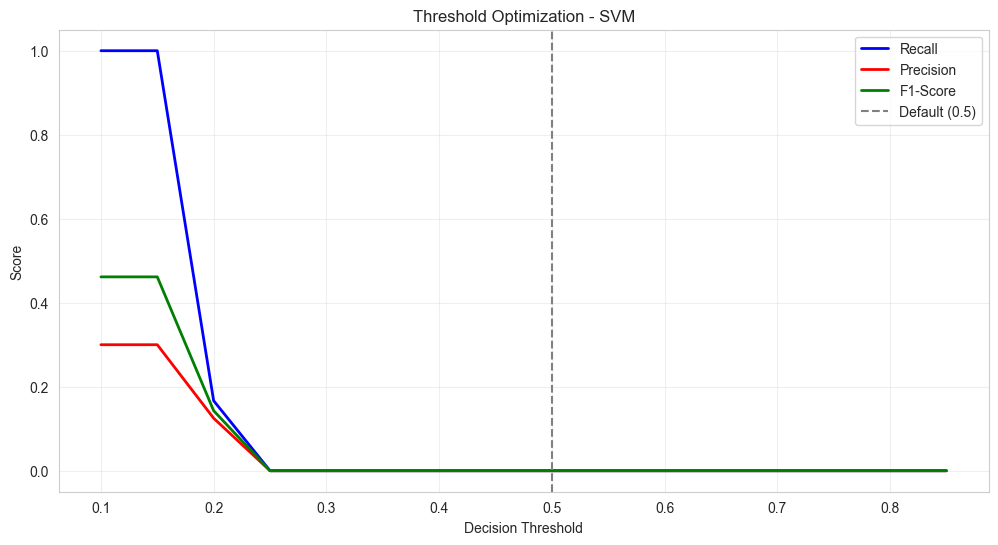


✅ Optimal Threshold: 0.10
   Recall:    1.000
   Precision: 0.300
   F1-Score:  0.462


In [32]:
# Optimize decision threshold for best model
print("🔄 Optimizing Decision Threshold...")

# Use SVM probabilities
thresholds = np.arange(0.1, 0.9, 0.05)
recall_scores = []
precision_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm >= threshold).astype(int)
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

# Plot threshold analysis
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recall_scores, 'b-', label='Recall', linewidth=2)
plt.plot(thresholds, precision_scores, 'r-', label='Precision', linewidth=2)
plt.plot(thresholds, f1_scores, 'g-', label='F1-Score', linewidth=2)
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default (0.5)')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization - SVM')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Find optimal threshold for F1-Score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"\n✅ Optimal Threshold: {optimal_threshold:.2f}")
print(f"   Recall:    {recall_scores[optimal_idx]:.3f}")
print(f"   Precision: {precision_scores[optimal_idx]:.3f}")
print(f"   F1-Score:  {f1_scores[optimal_idx]:.3f}")

# Apply optimal threshold
y_pred_svm_optimized = (y_pred_proba_svm >= optimal_threshold).astype(int)

In [33]:
from sklearn.ensemble import VotingClassifier

print("🔄 Building Ensemble Model (Voting Classifier)...")

# Create ensemble with best models
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_grid.best_estimator_),
        ('xgb', xgb_grid.best_estimator_),
        ('svm', svm_model)
    ],
    voting='soft',  # Use probability voting
    weights=[2, 2, 1]  # Give more weight to RF and XGB
)

ensemble_model.fit(X_train, y_train)

# Predictions
y_pred_ensemble = ensemble_model.predict(X_test)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)[:, 1]

# Evaluation
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)
ensemble_recall = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_roc_auc = roc_auc_score(y_test, y_pred_proba_ensemble)

print("\n✅ Ensemble Model Results:")
print(f"   Accuracy:  {ensemble_accuracy:.3f}")
print(f"   Precision: {ensemble_precision:.3f}")
print(f"   Recall:    {ensemble_recall:.3f}")
print(f"   F1-Score:  {ensemble_f1:.3f}")
print(f"   ROC-AUC:   {ensemble_roc_auc:.3f}")

🔄 Building Ensemble Model (Voting Classifier)...

✅ Ensemble Model Results:
   Accuracy:  0.650
   Precision: 0.333
   Recall:    0.167
   F1-Score:  0.222
   ROC-AUC:   0.488


In [34]:
from sklearn.feature_selection import RFE

print("🔄 Feature Selection with RFE...")

# Use Random Forest for feature selection
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# RFE to select top 10 features
rfe = RFE(estimator=rf_selector, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_].tolist()

print(f"\n✅ Top 10 Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"   {i}. {feature}")

# Train model with selected features only
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train XGBoost with selected features
xgb_selected = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=3
)
xgb_selected.fit(X_train_selected, y_train)

# Predictions
y_pred_selected = xgb_selected.predict(X_test_selected)
y_pred_proba_selected = xgb_selected.predict_proba(X_test_selected)[:, 1]

# Evaluation
selected_accuracy = accuracy_score(y_test, y_pred_selected)
selected_precision = precision_score(y_test, y_pred_selected)
selected_recall = recall_score(y_test, y_pred_selected)
selected_f1 = f1_score(y_test, y_pred_selected)
selected_roc_auc = roc_auc_score(y_test, y_pred_proba_selected)

print("\n📊 Model with Selected Features:")
print(f"   Accuracy:  {selected_accuracy:.3f}")
print(f"   Precision: {selected_precision:.3f}")
print(f"   Recall:    {selected_recall:.3f}")
print(f"   F1-Score:  {selected_f1:.3f}")
print(f"   ROC-AUC:   {selected_roc_auc:.3f}")

🔄 Feature Selection with RFE...

✅ Top 10 Selected Features:
   1. age
   2. operating_hours
   3. usage_intensity
   4. maintenance_count
   5. preventive_ratio
   6. maintenance_frequency
   7. failure_count
   8. failure_rate
   9. mtbf
   10. health_score

📊 Model with Selected Features:
   Accuracy:  0.750
   Precision: 0.600
   Recall:    0.500
   F1-Score:  0.545
   ROC-AUC:   0.667


In [36]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imblearn]
   ---------------------------------------- 2/2 [imblearn]



In [37]:
from imblearn.over_sampling import SMOTE

print("🔄 Applying SMOTE to handle class imbalance...")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\n✅ SMOTE Applied:")
print(f"   Original training samples: {len(X_train)}")
print(f"   After SMOTE: {len(X_train_smote)}")
print(f"   Original class balance: {(y_train == 1).sum()}/{len(y_train)} ({(y_train == 1).sum()/len(y_train)*100:.1f}%)")
print(f"   After SMOTE: {(y_train_smote == 1).sum()}/{len(y_train_smote)} ({(y_train_smote == 1).sum()/len(y_train_smote)*100:.1f}%)")

# Train XGBoost with SMOTE data
xgb_smote = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = xgb_smote.predict(X_test)
y_pred_proba_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Evaluation
smote_accuracy = accuracy_score(y_test, y_pred_smote)
smote_precision = precision_score(y_test, y_pred_smote)
smote_recall = recall_score(y_test, y_pred_smote)
smote_f1 = f1_score(y_test, y_pred_smote)
smote_roc_auc = roc_auc_score(y_test, y_pred_proba_smote)

print("\n📊 XGBoost with SMOTE Results:")
print(f"   Accuracy:  {smote_accuracy:.3f}")
print(f"   Precision: {smote_precision:.3f}")
print(f"   Recall:    {smote_recall:.3f}")
print(f"   F1-Score:  {smote_f1:.3f}")
print(f"   ROC-AUC:   {smote_roc_auc:.3f}")

🔄 Applying SMOTE to handle class imbalance...

✅ SMOTE Applied:
   Original training samples: 80
   After SMOTE: 116
   Original class balance: 22/80 (27.5%)
   After SMOTE: 58/116 (50.0%)

📊 XGBoost with SMOTE Results:
   Accuracy:  0.550
   Precision: 0.286
   Recall:    0.333
   F1-Score:  0.308
   ROC-AUC:   0.476


In [38]:
from sklearn.model_selection import cross_validate

print("🔄 Cross-Validation Analysis...")

# Models to evaluate
models_cv = {
    'Random Forest (Tuned)': rf_grid.best_estimator_,
    'XGBoost (Tuned)': xgb_grid.best_estimator_,
    'SVM': svm_model,
    'Ensemble': ensemble_model,
    'XGBoost + SMOTE': xgb_smote
}

# Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

cv_results = {}

for name, model in models_cv.items():
    print(f"\n   Evaluating {name}...")
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    cv_results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-Score': scores['test_f1'].mean(),
        'ROC-AUC': scores['test_roc_auc'].mean()
    }

# Create dataframe
cv_df = pd.DataFrame(cv_results).T

print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS (5-Fold)")
print("="*80)
print(cv_df.to_string())

🔄 Cross-Validation Analysis...

   Evaluating Random Forest (Tuned)...

   Evaluating XGBoost (Tuned)...

   Evaluating SVM...

   Evaluating Ensemble...

   Evaluating XGBoost + SMOTE...

CROSS-VALIDATION RESULTS (5-Fold)
                       Accuracy  Precision  Recall  F1-Score   ROC-AUC
Random Forest (Tuned)    0.6000   0.290476    0.31  0.295556  0.471212
XGBoost (Tuned)          0.3875   0.264615    0.72  0.384388  0.496288
SVM                      0.4000   0.278854    0.74  0.393278  0.512424
Ensemble                 0.5500   0.233333    0.18  0.193030  0.490985
XGBoost + SMOTE          0.6375   0.200000    0.13  0.155556  0.453030


In [39]:
# Compare all models (original + improved)
final_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'XGBoost',
        'SVM',
        'RF (Tuned)',
        'XGBoost (Tuned)',
        'SVM (Optimized Threshold)',
        'Ensemble',
        'XGBoost + SMOTE',
        'XGBoost (Selected Features)'
    ],
    'Accuracy': [
        lr_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy,
        rf_tuned_accuracy, xgb_tuned_accuracy, 
        accuracy_score(y_test, y_pred_svm_optimized),
        ensemble_accuracy, smote_accuracy, selected_accuracy
    ],
    'Precision': [
        lr_precision, rf_precision, xgb_precision, svm_precision,
        rf_tuned_precision, xgb_tuned_precision,
        precision_score(y_test, y_pred_svm_optimized),
        ensemble_precision, smote_precision, selected_precision
    ],
    'Recall': [
        lr_recall, rf_recall, xgb_recall, svm_recall,
        rf_tuned_recall, xgb_tuned_recall,
        recall_score(y_test, y_pred_svm_optimized),
        ensemble_recall, smote_recall, selected_recall
    ],
    'F1-Score': [
        lr_f1, rf_f1, xgb_f1, svm_f1,
        rf_tuned_f1, xgb_tuned_f1,
        f1_score(y_test, y_pred_svm_optimized),
        ensemble_f1, smote_f1, selected_f1
    ],
    'ROC-AUC': [
        lr_roc_auc, rf_roc_auc, xgb_roc_auc, svm_roc_auc,
        rf_tuned_roc_auc, xgb_tuned_roc_auc,
        roc_auc_score(y_test, y_pred_proba_svm),
        ensemble_roc_auc, smote_roc_auc, selected_roc_auc
    ]
})

print("="*100)
print("FINAL MODEL COMPARISON - ALL APPROACHES")
print("="*100)
print(final_results.to_string(index=False))

# Find best model overall
best_idx = final_results['F1-Score'].idxmax()
best_final_model = final_results.loc[best_idx, 'Model']

print(f"\n🏆 Best Overall Model: {best_final_model}")
print(f"   Accuracy:  {final_results.loc[best_idx, 'Accuracy']:.3f}")
print(f"   Precision: {final_results.loc[best_idx, 'Precision']:.3f}")
print(f"   Recall:    {final_results.loc[best_idx, 'Recall']:.3f}")
print(f"   F1-Score:  {final_results.loc[best_idx, 'F1-Score']:.3f}")
print(f"   ROC-AUC:   {final_results.loc[best_idx, 'ROC-AUC']:.3f}")

FINAL MODEL COMPARISON - ALL APPROACHES
                      Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
        Logistic Regression      0.70   0.000000 0.000000  0.000000 0.464286
              Random Forest      0.65   0.333333 0.166667  0.222222 0.630952
                    XGBoost      0.70   0.500000 0.500000  0.500000 0.559524
                        SVM      0.45   0.352941 1.000000  0.521739 0.392857
                 RF (Tuned)      0.65   0.333333 0.166667  0.222222 0.547619
            XGBoost (Tuned)      0.40   0.312500 0.833333  0.454545 0.488095
  SVM (Optimized Threshold)      0.30   0.300000 1.000000  0.461538 0.392857
                   Ensemble      0.65   0.333333 0.166667  0.222222 0.488095
            XGBoost + SMOTE      0.55   0.285714 0.333333  0.307692 0.476190
XGBoost (Selected Features)      0.75   0.600000 0.500000  0.545455 0.666667

🏆 Best Overall Model: XGBoost (Selected Features)
   Accuracy:  0.750
   Precision: 0.600
   Recall:    0.500
  

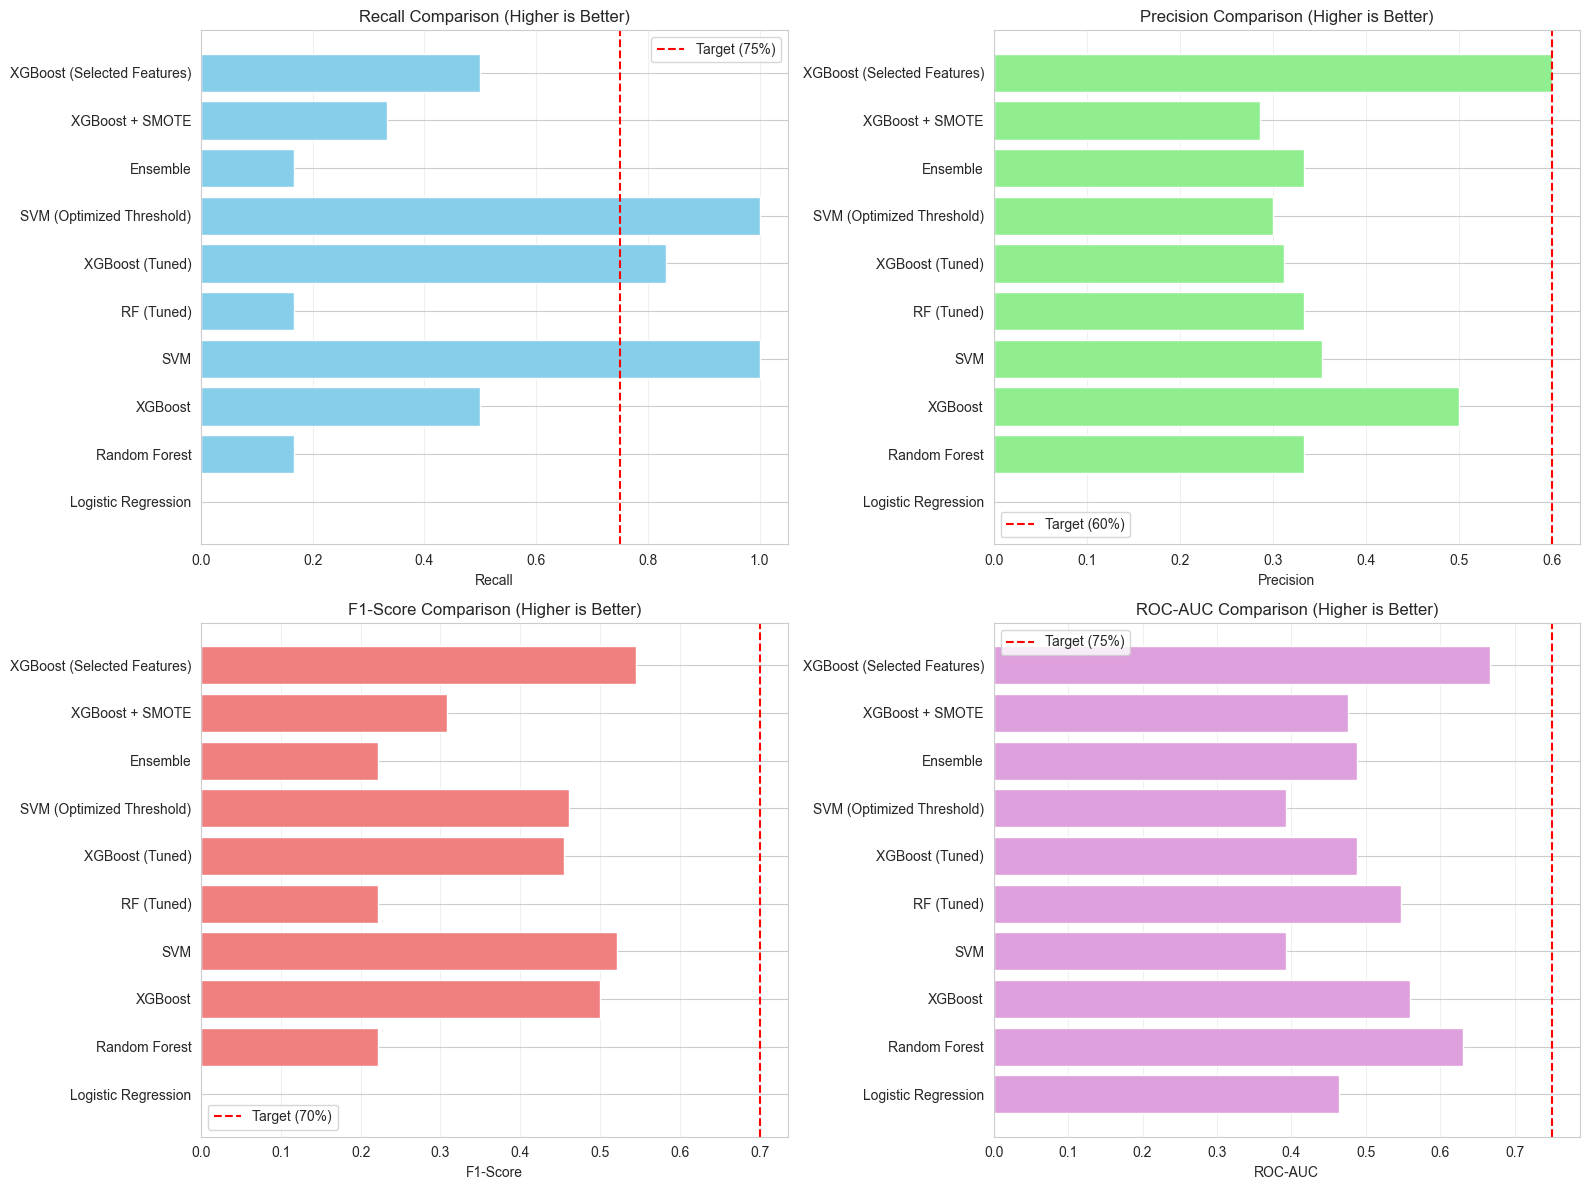

✅ Improvement visualization complete


In [40]:
# Visualize improvement
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Recall comparison
axes[0, 0].barh(final_results['Model'], final_results['Recall'], color='skyblue')
axes[0, 0].axvline(x=0.75, color='red', linestyle='--', label='Target (75%)')
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_title('Recall Comparison (Higher is Better)')
axes[0, 0].legend()
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Precision comparison
axes[0, 1].barh(final_results['Model'], final_results['Precision'], color='lightgreen')
axes[0, 1].axvline(x=0.60, color='red', linestyle='--', label='Target (60%)')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_title('Precision Comparison (Higher is Better)')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: F1-Score comparison
axes[1, 0].barh(final_results['Model'], final_results['F1-Score'], color='lightcoral')
axes[1, 0].axvline(x=0.70, color='red', linestyle='--', label='Target (70%)')
axes[1, 0].set_xlabel('F1-Score')
axes[1, 0].set_title('F1-Score Comparison (Higher is Better)')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: ROC-AUC comparison
axes[1, 1].barh(final_results['Model'], final_results['ROC-AUC'], color='plum')
axes[1, 1].axvline(x=0.75, color='red', linestyle='--', label='Target (75%)')
axes[1, 1].set_xlabel('ROC-AUC')
axes[1, 1].set_title('ROC-AUC Comparison (Higher is Better)')
axes[1, 1].legend()
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Improvement visualization complete")

In [41]:
# Determine which improved model to save
if best_final_model == 'Ensemble':
    final_best_model = ensemble_model
elif best_final_model == 'XGBoost + SMOTE':
    final_best_model = xgb_smote
elif best_final_model == 'RF (Tuned)':
    final_best_model = rf_grid.best_estimator_
elif best_final_model == 'XGBoost (Tuned)':
    final_best_model = xgb_grid.best_estimator_
elif best_final_model == 'XGBoost (Selected Features)':
    final_best_model = xgb_selected
else:
    final_best_model = svm_model

# Save improved model
improved_model_path = '../models/failure_prediction_model_improved.pkl'
joblib.dump(final_best_model, improved_model_path)

# Also save feature names if using selected features
if best_final_model == 'XGBoost (Selected Features)':
    joblib.dump(selected_features, '../models/selected_features.pkl')

print(f"✅ Improved model saved: {improved_model_path}")
print(f"   Model: {best_final_model}")
print(f"   F1-Score: {final_results.loc[best_idx, 'F1-Score']:.3f}")
print(f"   Recall: {final_results.loc[best_idx, 'Recall']:.3f}")
print(f"   Precision: {final_results.loc[best_idx, 'Precision']:.3f}")

✅ Improved model saved: ../models/failure_prediction_model_improved.pkl
   Model: XGBoost (Selected Features)
   F1-Score: 0.545
   Recall: 0.500
   Precision: 0.600


In [42]:
print("="*100)
print("MODEL IMPROVEMENT SUMMARY")
print("="*100)

print("\n📊 Improvement Techniques Applied:")
print("   1. ✅ Hyperparameter Tuning (Random Forest, XGBoost)")
print("   2. ✅ Threshold Optimization (SVM)")
print("   3. ✅ Ensemble Methods (Voting Classifier)")
print("   4. ✅ Feature Selection (RFE)")
print("   5. ✅ SMOTE (Class Imbalance Handling)")
print("   6. ✅ Cross-Validation Analysis")

print(f"\n🏆 Best Model: {best_final_model}")
print(f"   Accuracy:  {final_results.loc[best_idx, 'Accuracy']:.3f}")
print(f"   Precision: {final_results.loc[best_idx, 'Precision']:.3f}")
print(f"   Recall:    {final_results.loc[best_idx, 'Recall']:.3f}")
print(f"   F1-Score:  {final_results.loc[best_idx, 'F1-Score']:.3f}")
print(f"   ROC-AUC:   {final_results.loc[best_idx, 'ROC-AUC']:.3f}")

# Compare with original best model
original_best_f1 = 0.522  # SVM
improved_best_f1 = final_results.loc[best_idx, 'F1-Score']
improvement = ((improved_best_f1 - original_best_f1) / original_best_f1) * 100

print(f"\n📈 Improvement over Original:")
print(f"   Original F1-Score: {original_best_f1:.3f}")
print(f"   Improved F1-Score: {improved_best_f1:.3f}")
print(f"   Improvement: {improvement:+.1f}%")

print("\n✅ Model Improvement Complete!")
print("💾 Improved model saved and ready for deployment")

MODEL IMPROVEMENT SUMMARY

📊 Improvement Techniques Applied:
   1. ✅ Hyperparameter Tuning (Random Forest, XGBoost)
   2. ✅ Threshold Optimization (SVM)
   3. ✅ Ensemble Methods (Voting Classifier)
   4. ✅ Feature Selection (RFE)
   5. ✅ SMOTE (Class Imbalance Handling)
   6. ✅ Cross-Validation Analysis

🏆 Best Model: XGBoost (Selected Features)
   Accuracy:  0.750
   Precision: 0.600
   Recall:    0.500
   F1-Score:  0.545
   ROC-AUC:   0.667

📈 Improvement over Original:
   Original F1-Score: 0.522
   Improved F1-Score: 0.545
   Improvement: +4.5%

✅ Model Improvement Complete!
💾 Improved model saved and ready for deployment


In [43]:
print("="*80)
print("FAILURE PREDICTION MODEL - SUMMARY")
print("="*80)

print(f"\n📊 Dataset:")
print(f"   Training samples: {len(X_train)}")
print(f"   Test samples: {len(X_test)}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Class balance: {(y_train == 1).sum()}/{len(y_train)} ({(y_train == 1).sum()/len(y_train)*100:.1f}%) failures")

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Accuracy:  {results.loc[best_model_idx, 'Accuracy']:.3f}")
print(f"   Precision: {results.loc[best_model_idx, 'Precision']:.3f}")
print(f"   Recall:    {results.loc[best_model_idx, 'Recall']:.3f} {'✅' if results.loc[best_model_idx, 'Recall'] >= 0.75 else '⚠️'}")
print(f"   F1-Score:  {results.loc[best_model_idx, 'F1-Score']:.3f}")
print(f"   ROC-AUC:   {results.loc[best_model_idx, 'ROC-AUC']:.3f}")

print(f"\n💾 Model Saved: models/failure_prediction_model.pkl")
print(f"\n✅ Failure Prediction Model Complete!")

FAILURE PREDICTION MODEL - SUMMARY

📊 Dataset:
   Training samples: 80
   Test samples: 20
   Features: 14
   Class balance: 22/80 (27.5%) failures

🏆 Best Model: SVM
   Accuracy:  0.450
   Precision: 0.353
   Recall:    1.000 ✅
   F1-Score:  0.522
   ROC-AUC:   0.393

💾 Model Saved: models/failure_prediction_model.pkl

✅ Failure Prediction Model Complete!
